## __Classification: Esploratory Data Analysis__

In [1]:
## importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import cv2
from PIL import Image

In [2]:
## setting up the images directory

images_dir = '../data/classification'

print(os.listdir(images_dir))

['0', '1', '2', '3', '4', '5', '6', '7', '8']


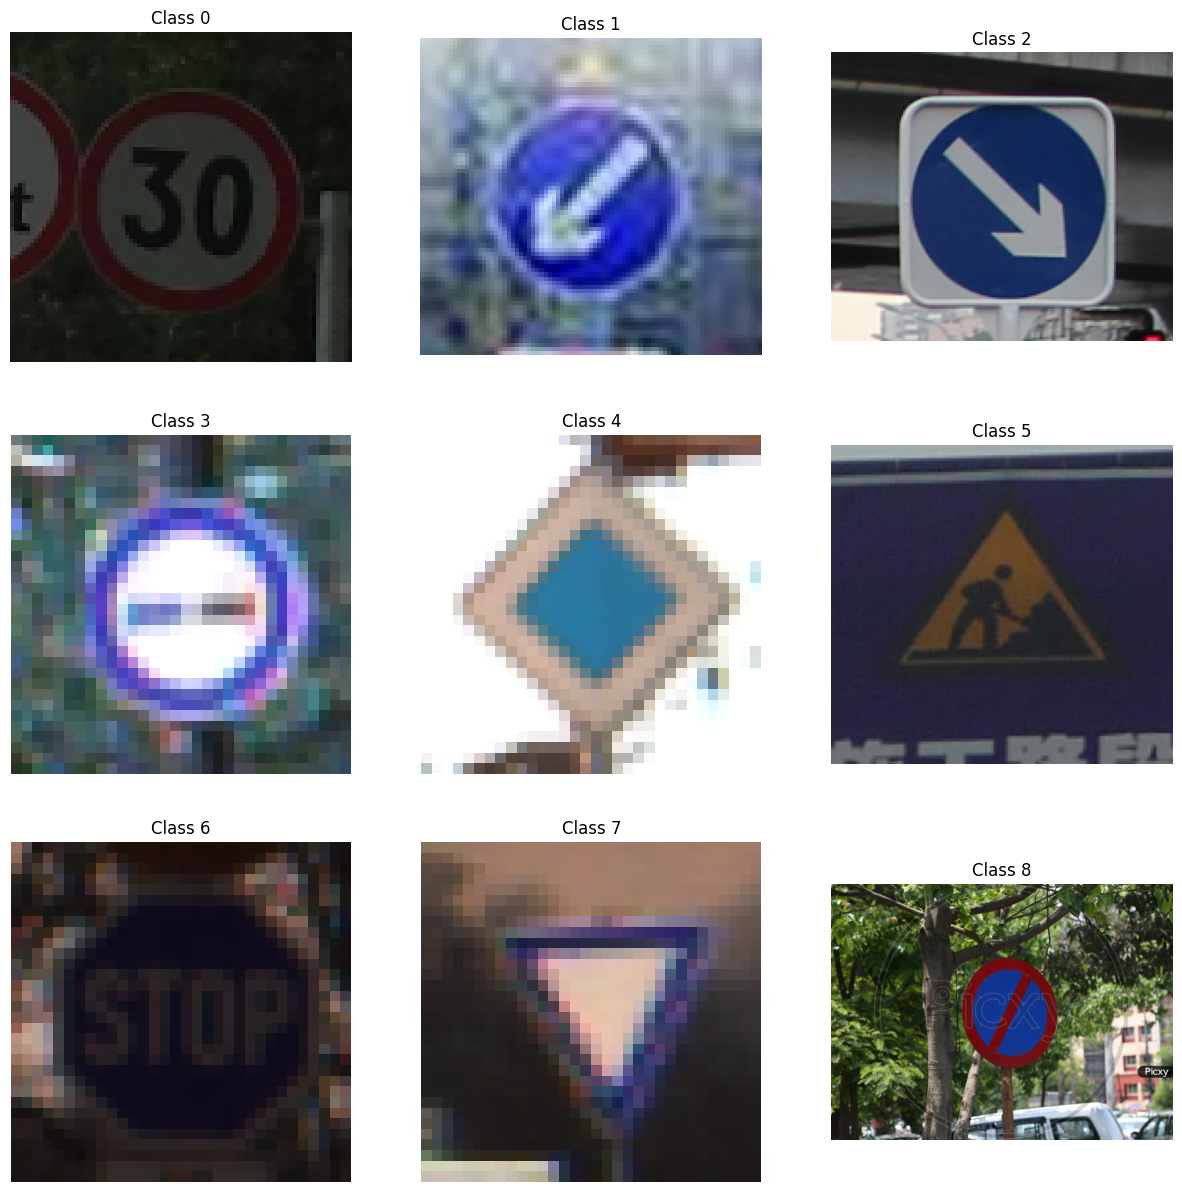

In [3]:
## showing one sample sign from each of the 9 folders in a 3x3 grid

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i in range(3):
    for j in range(3):
        img_path = os.path.join(images_dir, str(i*3+j), os.listdir(os.path.join(images_dir, str(i*3+j)))[0])
        img = Image.open(img_path)
        axs[i, j].imshow(img)
        axs[i, j].axis('off')
        axs[i, j].set_title(f'Class {i*3+j}')

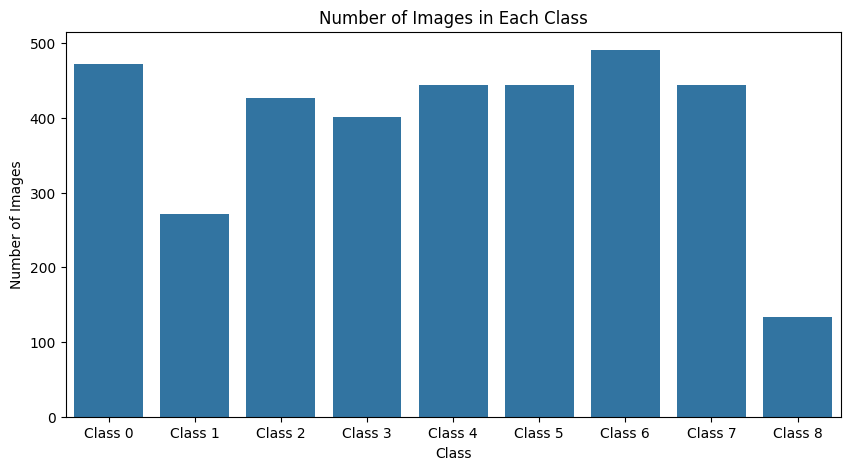

In [4]:
## showing the distribution of the number of images in each class

num_images = [len(os.listdir(os.path.join(images_dir, str(i)))) for i in range(9)]
plt.figure(figsize=(10, 5))

sns.barplot(x=[f'Class {i}' for i in range(9)], y=num_images)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class')
plt.show()

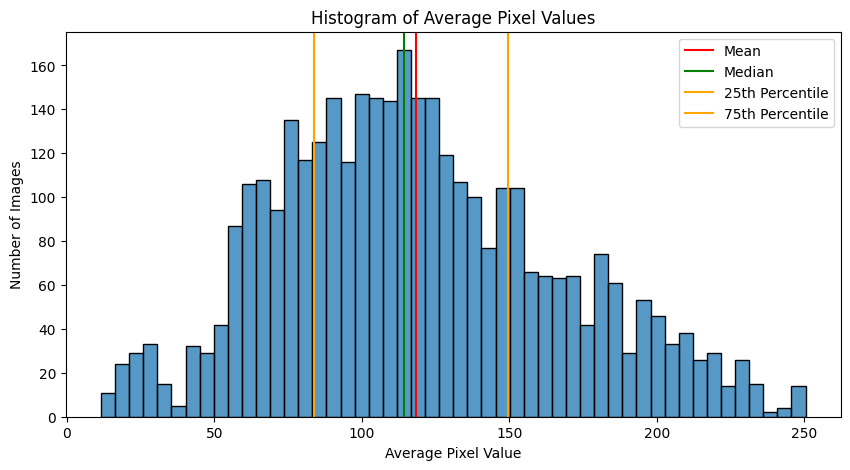

In [14]:
## histogram of average pixel values per image with a 50-bin histogram
## plot the mean, median, 25th and 75th percentiles

avg_pixel_values = []

for i in range(9):
    for img_name in os.listdir(os.path.join(images_dir, str(i))):
        try:
            img = cv2.imread(os.path.join(images_dir, str(i), img_name))
            avg_pixel_values.append(np.mean(img))
        except:
            continue

avg_pixel_values = np.array(avg_pixel_values)

plt.figure(figsize=(10, 5))
sns.histplot(avg_pixel_values, bins=50)
plt.axvline(np.mean(avg_pixel_values), color='red', label='Mean')
plt.axvline(np.median(avg_pixel_values), color='green', label='Median')
plt.axvline(np.percentile(avg_pixel_values, 25), color='orange', label='25th Percentile')
plt.axvline(np.percentile(avg_pixel_values, 75), color='orange', label='75th Percentile')
plt.xlabel('Average Pixel Value')
plt.ylabel('Number of Images')
plt.title('Histogram of Average Pixel Values')
plt.legend()
plt.show()